<a href="https://colab.research.google.com/github/aidanbolinger/ArtificialIntelligence/blob/main/Copy_of_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nbstripout
!nbstripout HW5.ipynb

Could not strip 'HW5.ipynb': file not found


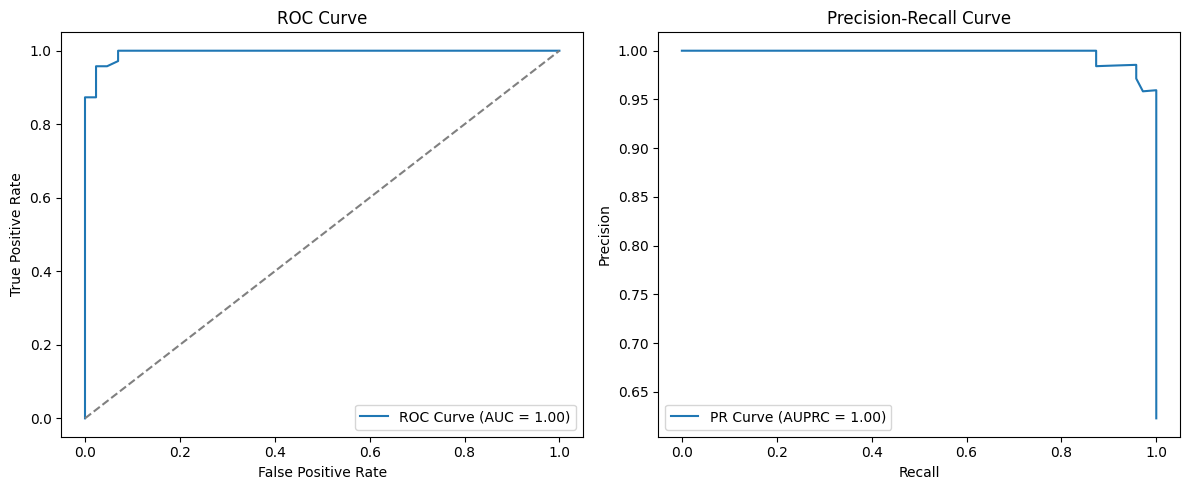

AUC (ROC): 0.9953
AUPRC: 0.9970


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_curve, auc,
    precision_recall_curve, average_precision_score
)
import matplotlib.pyplot as plt

#Programming Task 1:

# Step 1: Load and Prepare the Data
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 2: Train the Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Evaluate Using ROC and PR Curves
y_proba = rf_model.predict_proba(X_test)[:, 1]

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# PR Curve and AUPRC
precision, recall, _ = precision_recall_curve(y_test, y_proba)
auprc = average_precision_score(y_test, y_proba)

# Step 4: Plotting
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR Curve (AUPRC = {auprc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

print(f"AUC (ROC): {roc_auc:.4f}")
print(f"AUPRC: {auprc:.4f}")


In [ ]:
from transformers import pipeline

#Programming Task 2:

# Load the QA pipeline
qa_pipeline = pipeline("question-answering", model="distilbert-base-cased-distilled-squad")

# --- Part a & b: Charles Babbage Example ---
context1 = (
    "Charles Babbage is considered the father of the computer. "
    "He designed the Analytical Engine which is recognized as an early model for a general-purpose computer."
)

question1 = "Who is Charles Babbage?"

result1 = qa_pipeline(question=question1, context=context1)
print("Q1:", question1)
print("A1:", result1['answer'])
print()

# --- Part c: Custom context with two questions ---
context2 = (
    "The Eiffel Tower was constructed in 1889 for the World's Fair in Paris. "
    "Standing at over 300 meters tall, it was the tallest man-made structure at the time. "
    "Today, it is one of the most visited monuments in the world."
)

question2a = "When was the Eiffel Tower built?"
question2b = "How tall is the Eiffel Tower?"

result2a = qa_pipeline(question=question2a, context=context2)
result2b = qa_pipeline(question=question2b, context=context2)

print("Q2:", question2a)
print("A2:", result2a['answer'])
print()

print("Q3:", question2b)
print("A3:", result2b['answer'])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cpu


Q1: Who is Charles Babbage?
A1: the father of the computer

Q2: When was the Eiffel Tower built?
A2: 1889

Q3: How tall is the Eiffel Tower?
A3: over 300 meters
